In [62]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

%matplotlib notebook

In [69]:
# Read tudor's data
#data = scipy.io.loadmat('Cricket.mat')
data = scipy.io.loadmat('rt_simulated.mat')

In [139]:
sd = data['sd'][0]
xprev = data['xprev'][0]
rt = data['rt_sampled'][0]
hazard_sim = data['hr'][0]
rmean_sim = data['mu_rt'][0]

xc_sim = data['xcurr'][0]

<IPython.core.display.Javascript object>


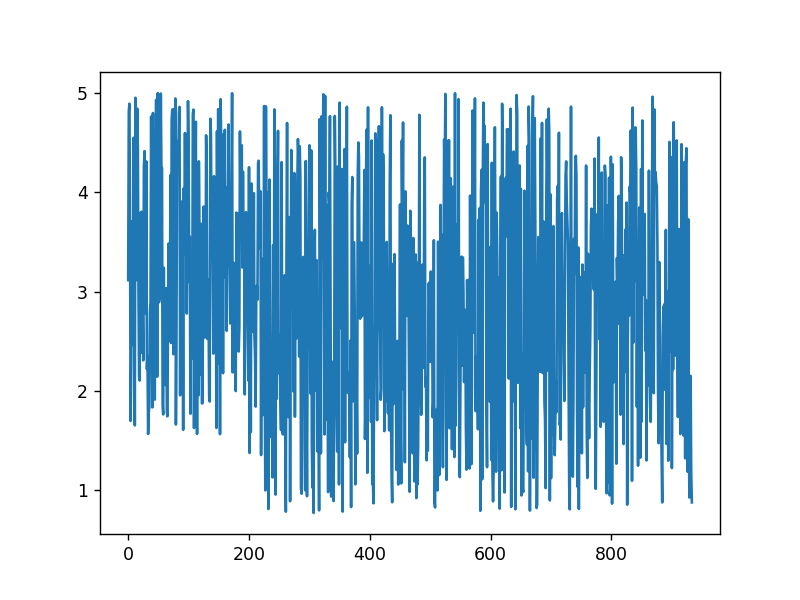

In [108]:
plt.figure()
plt.plot(sd)

In [80]:
#sess_id = 10
#RT = data['RT'][0,sess_id]
#SD = data['SD'][0,sess_id]

#rt = RT[1,:]
#sd = SD[1,:]
#xprev = SD[0,:]

In [145]:
# Generate data using prior for prior-predictive check
sm_sim = pystan.StanModel(file='simple_model.stan')

# Generate quantities from prior
R = 1000 # 100 trials
N = 60 #time steps

sim_data = sm_sim.sampling(data={'N': len(rt), 'rt': rt, 'stimdur': sd, 'xprev': xprev},
                     iter=R, warmup=0, chains=1, refresh=R,
                     seed=4838284, algorithm="Fixed_param")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b2cda226b387751f4b635fd634e86a65 NOW.


In [148]:
xc = sim_data.extract()['xc']
hazard = sim_data.extract()['hazard']
hazard_num = sim_data.extract()['hazard_numerator']
hazard_den = sim_data.extract()['hazard_denominator']
rmean = sim_data.extract()['rmean']
rtime = sim_data.extract()['r']


<IPython.core.display.Javascript object>


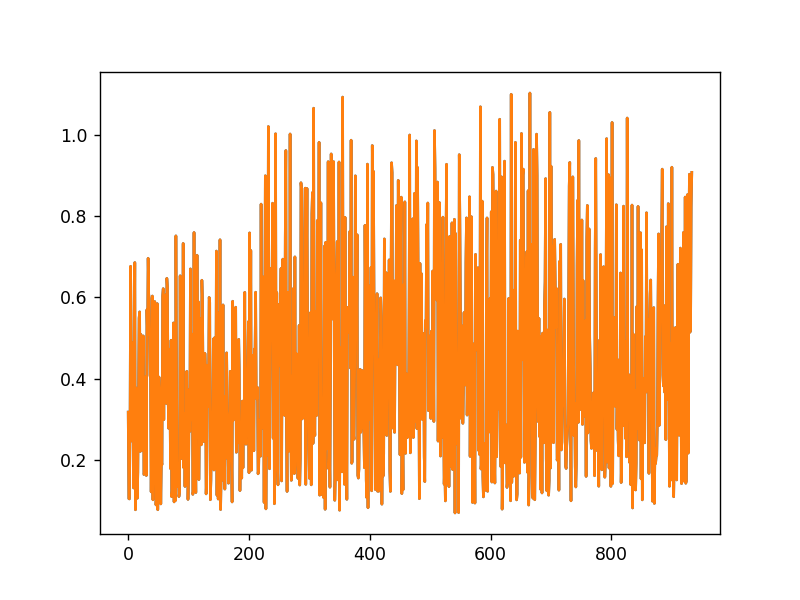

In [147]:
plt.figure()
plt.plot(rmean[0])
plt.plot(rmean_sim)
#plt.plot(xc_sim)

<IPython.core.display.Javascript object>


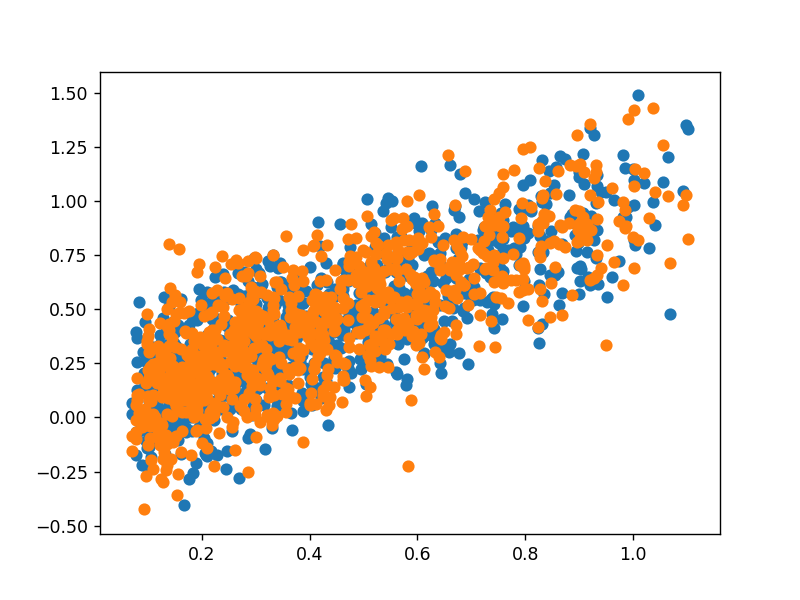

In [150]:
plt.figure()
plt.scatter(rmean[0], rtime[0])
plt.scatter(rmean_sim, rt)

In [120]:
hazard_den.shape

(1000, 934)

In [121]:
hazard_den[:,933]

array([0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259571,
       0.72259571, 0.72259571, 0.72259571, 0.72259571, 0.72259